### Loading liberary and dataset


In [1]:
library(e1071)
library(ISLR)
library(pls)



Attaching package: ‘pls’


The following object is masked from ‘package:stats’:

    loadings




### Support Vector Machine


#### Generate data with nonlinear boundary


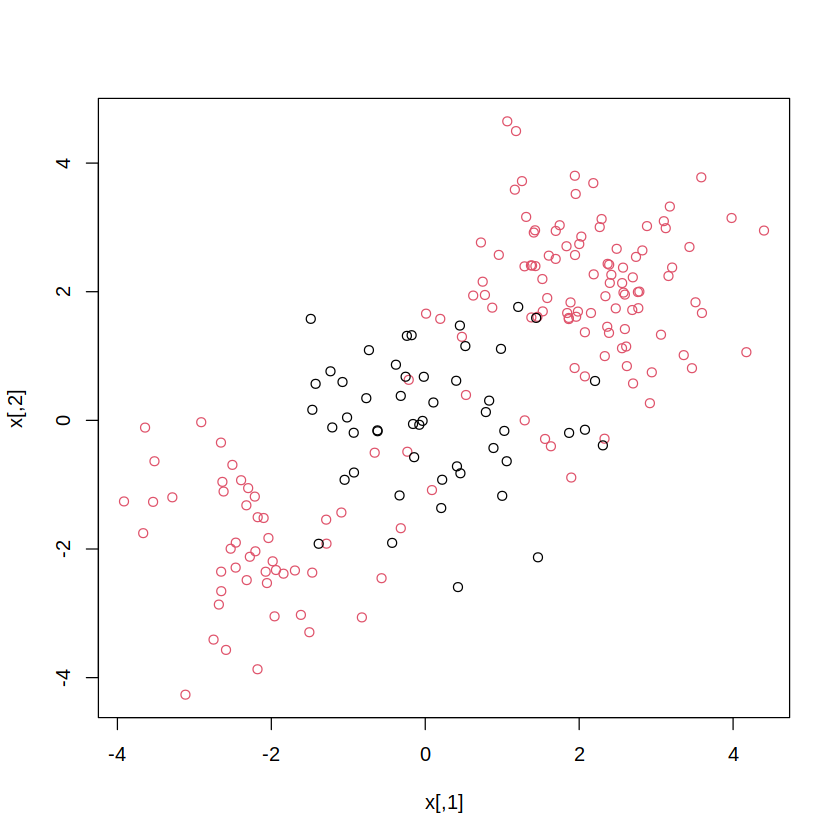

In [2]:
set.seed(1)
x <- matrix(rnorm(200 * 2), ncol = 2)
x[1:100, ] <- x[1:100, ] + 2
x[101:150, ] <- x[101:150, ] - 2
y <- c(rep(1, 150), rep(2, 50))
dat <- data.frame(x = x, y = as.factor(y))
plot(x, col = (3 - y))


#### Use SVM with a radial kernel



Call:
svm(formula = y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, 
    cost = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  31

 ( 16 15 )


Number of Classes:  2 

Levels: 
 1 2




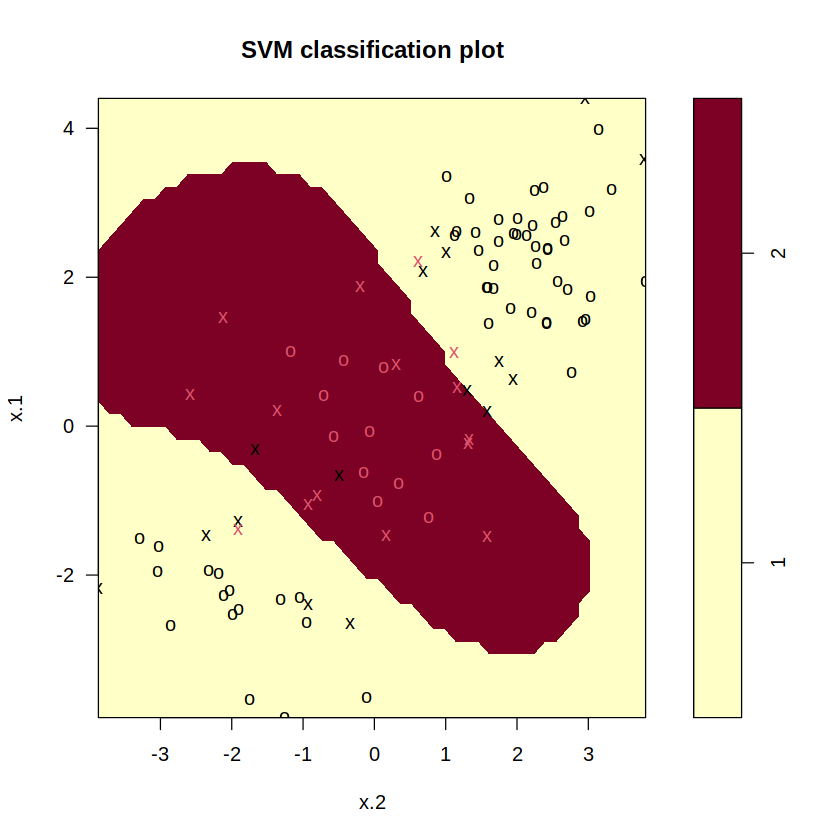

In [3]:
train <- sample(200, 100)
svmfit <- svm(y ~ ., data = dat[train, ], kernel = "radial", gamma = 1, cost = 1)
## "cost" is similar to tuning parameter C, but with opposite
## Effects: small "cost", wide margin; large "cost", narrow margin

plot(svmfit, dat[train, ])
summary(svmfit)


#### Select best values for "gamma" and "cost" by CV



Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
    1   0.5

- best performance: 0.06 

- Detailed performance results:
    cost gamma error dispersion
1  1e-01   0.5  0.27 0.14944341
2  1e+00   0.5  0.06 0.08432740
3  1e+01   0.5  0.07 0.08232726
4  1e+02   0.5  0.10 0.09428090
5  1e+03   0.5  0.12 0.10327956
6  1e-01   1.0  0.18 0.16865481
7  1e+00   1.0  0.07 0.09486833
8  1e+01   1.0  0.09 0.09944289
9  1e+02   1.0  0.10 0.08164966
10 1e+03   1.0  0.09 0.09944289
11 1e-01   2.0  0.26 0.15776213
12 1e+00   2.0  0.08 0.11352924
13 1e+01   2.0  0.12 0.12292726
14 1e+02   2.0  0.12 0.13165612
15 1e+03   2.0  0.13 0.10593499
16 1e-01   3.0  0.27 0.13374935
17 1e+00   3.0  0.09 0.11005049
18 1e+01   3.0  0.10 0.13333333
19 1e+02   3.0  0.13 0.10593499
20 1e+03   3.0  0.15 0.10801234
21 1e-01   4.0  0.27 0.13374935
22 1e+00   4.0  0.09 0.12866839
23 1e+01   4.0  0.10 0.13333333
24 1e+02   4.0  0.15 0.13540064
25 1e+03   4.0  0.17 0

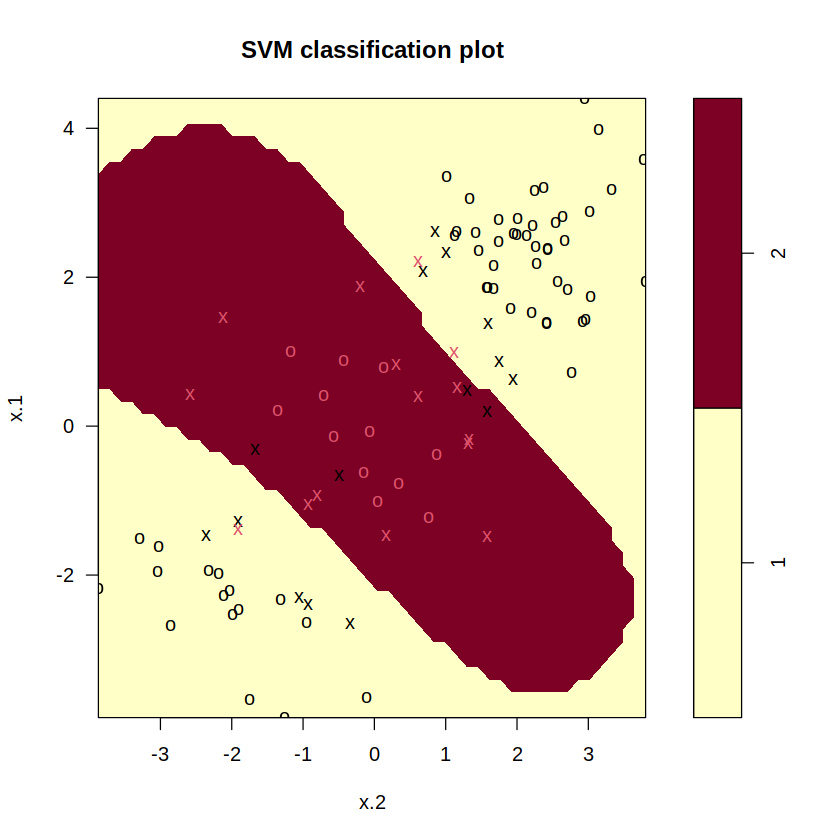

In [4]:
tune.out <- tune(svm, y ~ ., data = dat[train, ], kernel = "radial", ranges = list(cost = c(0.1, 1, 10, 100, 1000), gamma = c(0.5, 1, 2, 3, 4)))
plot(tune.out$best.model, dat[train, ])
summary(tune.out)


#### Use SVM with a polynomial kernel


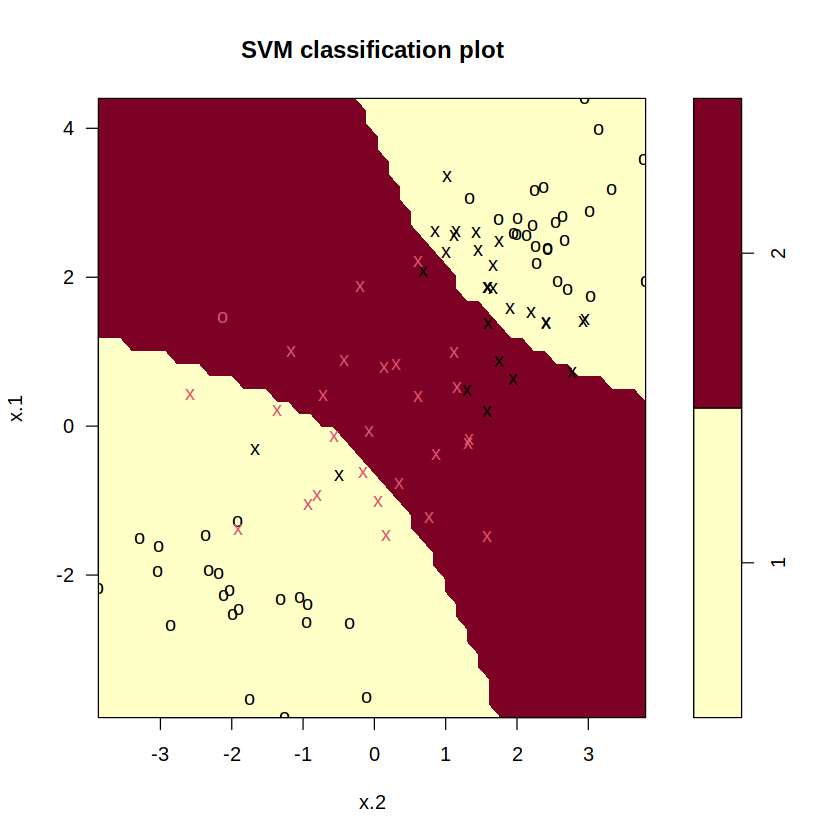

In [5]:
svmfit <- svm(y ~ ., data = dat[train, ], kernel = "polynomial", degree = 2, ranges = list(cost = c(0.001, 0.01, 0.1, 1, 5, 10, 100)))
plot(svmfit, dat[train, ])


### Principal Components Analysis


In [6]:
names(USArrests)
pr.out <- prcomp(USArrests, scale = TRUE)
names(pr.out)
## Rotation: principal component loadings


[1] "Murder"   "Assault"  "UrbanPop" "Rape"

[1] "sdev"     "rotation" "center"   "scale"    "x"

,PC1,PC2,PC3,PC4
Murder,-0.5358995,-0.4181809,0.3412327,0.64922780
Assault,-0.5831836,-0.1879856,0.2681484,-0.74340748
UrbanPop,-0.2781909,0.8728062,0.3780158,0.13387773
Rape,-0.5434321,0.1673186,-0.8177779,0.08902432


[1] 1.5748783 0.9948694 0.5971291 0.4164494

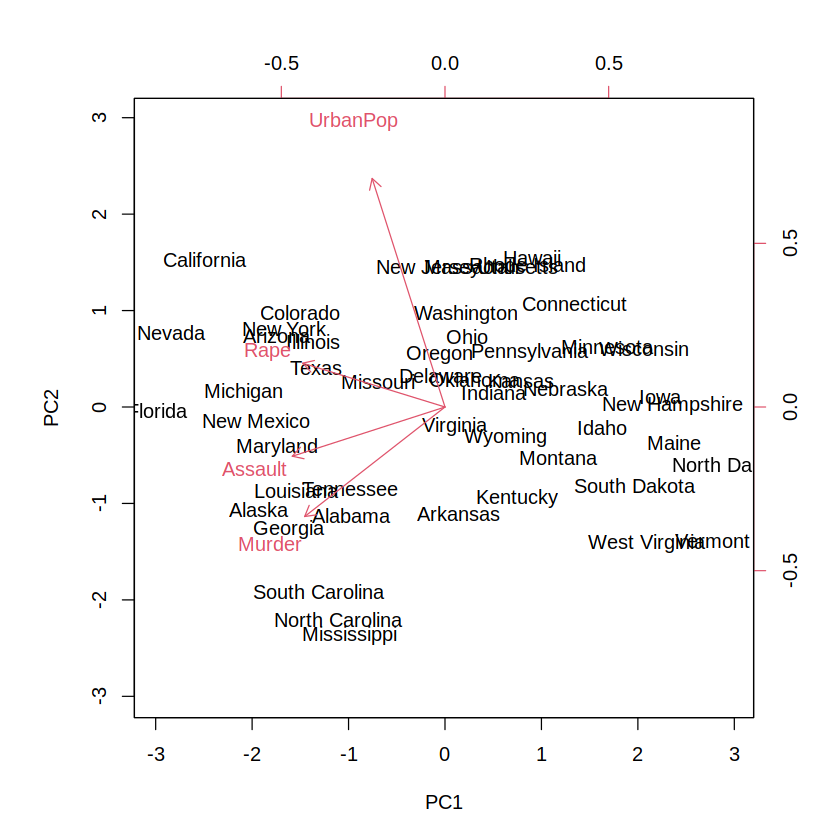

In [7]:
pr.out$rotation
biplot(pr.out, scale = 0)
## sdev: standard deviation of principal components
pr.out$sdev
pr.var <- pr.out$sdev^2


#### Compute the proportion of variance explained by each principal component


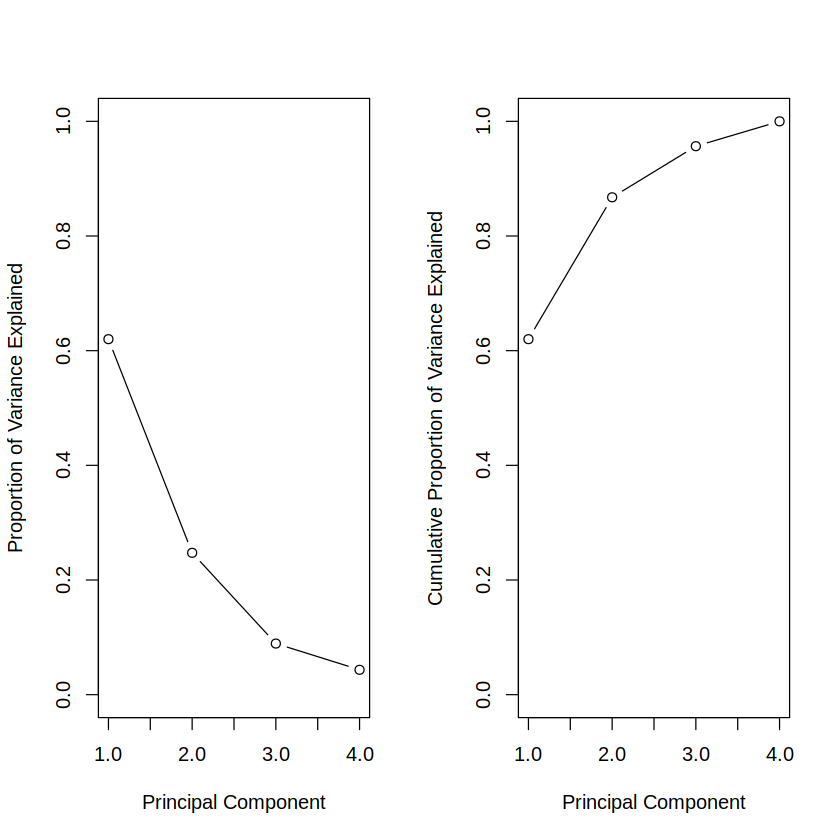

In [8]:
pve <- pr.var / sum(pr.var)
par(mfrow = c(1, 2))
plot(pve, xlab = " Principal Component ", ylab = " Proportion of Variance Explained ", ylim = c(0, 1), type = "b")
plot(cumsum(pve), xlab = " Principal Component ", ylab = " Cumulative Proportion of Variance Explained ", ylim = c(0, 1), type = "b")


### Principal Components Regression


In [9]:
attach(Hitters)
## Remove rows with missing values
Hitters <- na.omit(Hitters)
set.seed(2)

## 10-fold cross-validation,
pcr.fit <- pcr(Salary ~ ., data = Hitters, scale = TRUE, validation = "CV")
summary(pcr.fit)


Data: 	X dimension: 263 19 
	Y dimension: 263 1
Fit method: svdpc
Number of components considered: 19

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV             452    351.9    353.2    355.0    352.8    348.4    343.6
adjCV          452    351.6    352.7    354.4    352.1    347.6    342.7
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       345.5    347.7    349.6     351.4     352.1     353.5     358.2
adjCV    344.7    346.7    348.5     350.1     350.7     352.0     356.5
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps
CV        349.7     349.4     339.9     341.6     339.2     339.6
adjCV     348.0     347.7     338.2     339.7     337.2     337.6

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         38.31    60.16    70.84    79.03    84.29    88.63    92.26    94.96
Salary    4

#### Plot the CV scores


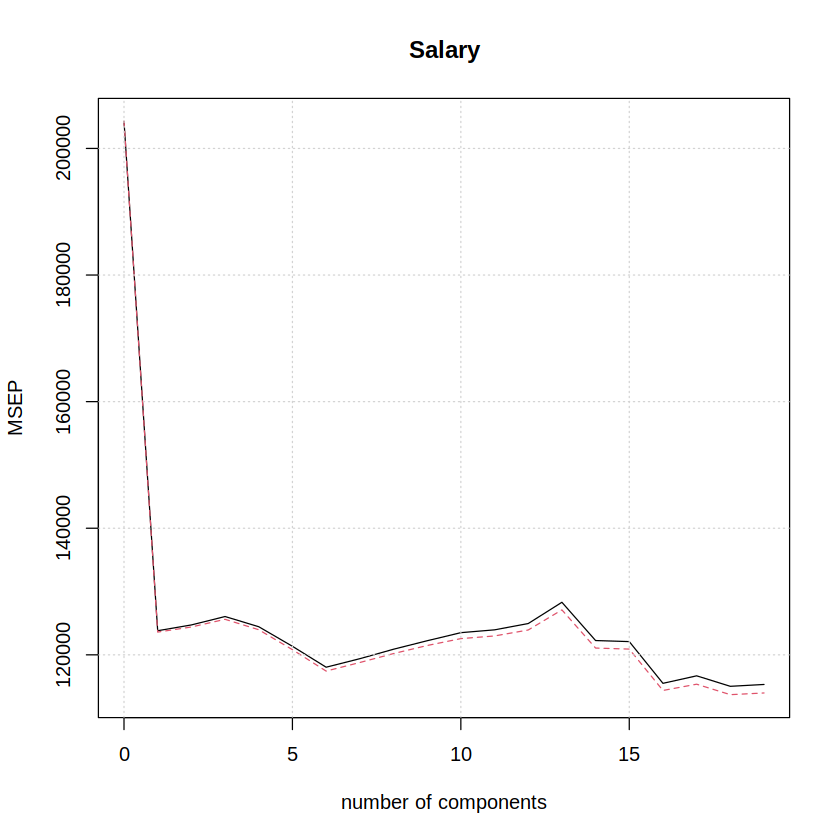

In [10]:
validationplot(pcr.fit, val.type = "MSEP")
grid()


#### Create training set and test set


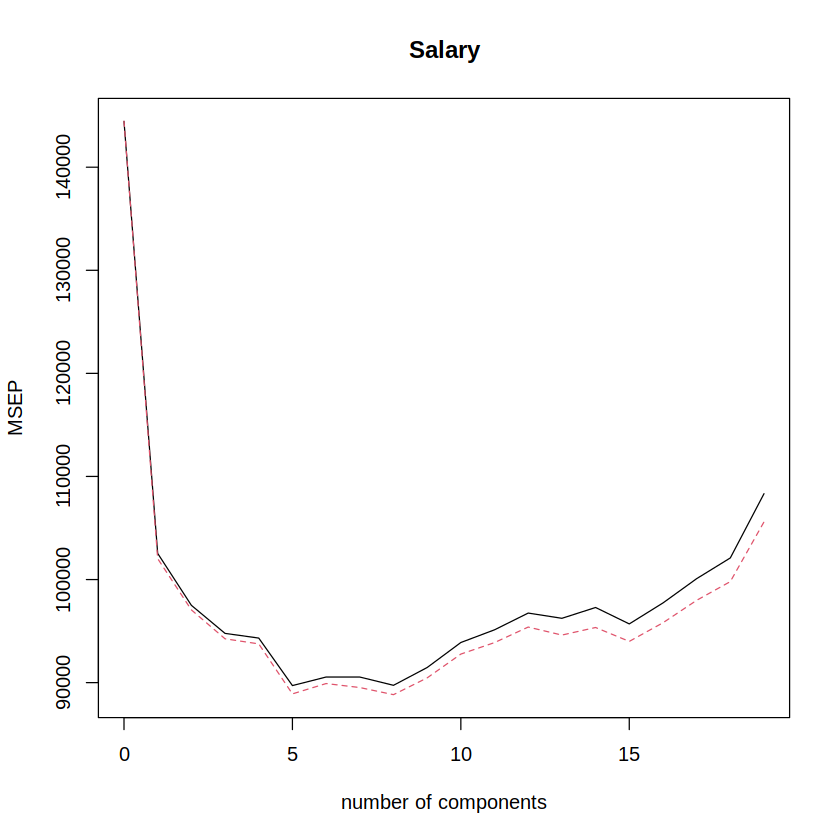

In [11]:
x <- model.matrix(Salary ~ ., Hitters)[, -1]
y <- Hitters$Salary
train <- sample(1:nrow(x), nrow(x) / 2)
test <- (-train)
y.test <- y[test]
## Perform PCR on training set
set.seed(1)
pcr.fit <- pcr(Salary ~ ., data = Hitters, subset = train, scale = TRUE, validation = "CV")

## Find the best M
validationplot(pcr.fit, val.type = "MSEP")


#### Compute test MSE


In [12]:
pcr.pred <- predict(pcr.fit, x[test, ], ncomp = 5)
## Compare with shrinkage method?
mean((pcr.pred - y.test)^2)

## Perform PCR on full data
pcr.fit <- pcr(y ~ x, scale = TRUE, ncomp = 5)


[1] 147790.4